Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train_ctrUa4K.csv')

In [3]:
test=pd.read_csv('test_lAUu6dG.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Exploring Data Set

In [7]:
print('The total rows are',train.shape[0],'In Train Set and',test.shape[0],'in Test set')

The total rows are 614 In Train Set and 367 in Test set


In [8]:
print('The total columns are',train.shape[1],'In Train Set and',test.shape[1],'in Test set')

The total columns are 13 In Train Set and 12 in Test set


## Univariate Analysis

In [9]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Text(0.5, 1.0, 'Count Plot Education')

<Figure size 432x288 with 0 Axes>

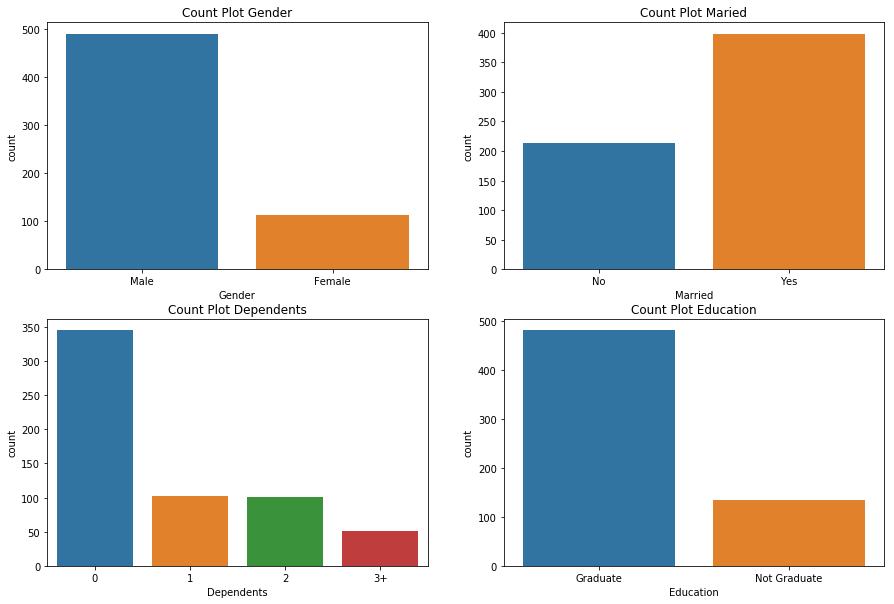

In [10]:
# Indepedent variables and categorical

plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(train.Gender)
plt.title('Count Plot Gender')

plt.subplot(222)
sns.countplot(train.Married)
plt.title('Count Plot Maried')

plt.subplot(223)
sns.countplot(train.Dependents)
plt.title('Count Plot Dependents')

plt.subplot(224)
sns.countplot(train.Education)
plt.title('Count Plot Education')

In [11]:
train.Gender.value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [12]:
train.Married.value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [13]:
train.Dependents.value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [14]:
train.Education.value_counts(normalize=True)

Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

<Figure size 432x288 with 0 Axes>

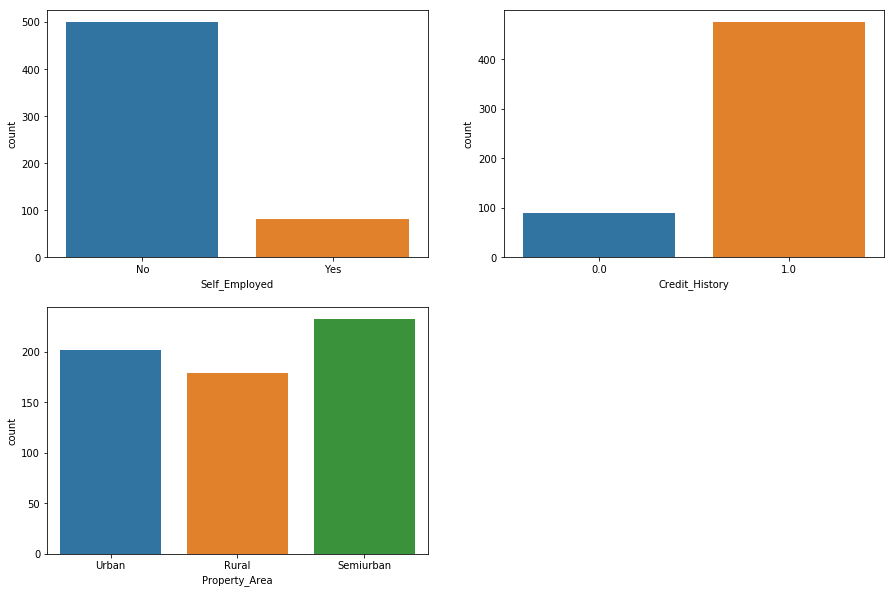

In [15]:
# Independent Cat Variables
plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(train.Self_Employed)

plt.subplot(222)
sns.countplot(train.Credit_History)

plt.subplot(223)
sns.countplot(train.Property_Area)

plt.show()


In [16]:
train.Self_Employed.value_counts(True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [17]:
train.Credit_History.value_counts(True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [18]:
train.Property_Area.value_counts(True)

Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

## Observation of Independent Categorical Variables:-
1. 82% Males and nearly 18% Females.
2. Count of Married is more than Not Married. This means 65% people are married where as 34% are unmarried.
3. Count of 0 is more.WHich means 57% people dont have kids.
4. The Level of Education is higher. means 78% people are Graduates.
5. 85% are not self employed and remaing 15% are self employed.
6. 84% people have credit history as 1.0
7. 38% is Semiurban,33% Urban and 29% are rural properties.

E:\Users\Soham Raut\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

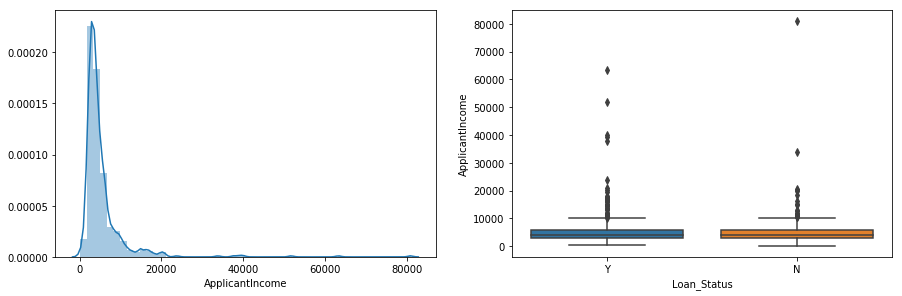

In [19]:
# Applicants Income
plt.figure(1)

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.distplot(train.ApplicantIncome)

plt.subplot(222)
sns.boxplot(train.Loan_Status,train.ApplicantIncome)


## Observation:-Applicant Income

1. SInce the applicant income appears to be skewed hence it can be log transformed to bring it to normal.
2. Box plot shows existence of outliers in income.
3. This shows there is a disparity in income in society.

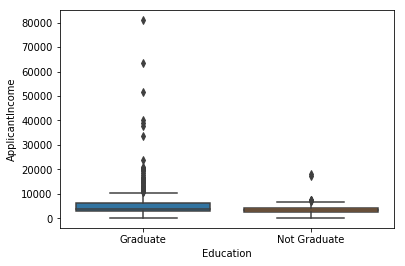

In [20]:
# Education Cat and Income num

sns.boxplot(train.Education,train.ApplicantIncome)

## Observation:-

Graduates are having more income than Not Graduate.

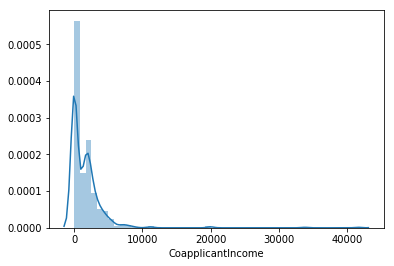

In [21]:
sns.distplot(train.CoapplicantIncome)

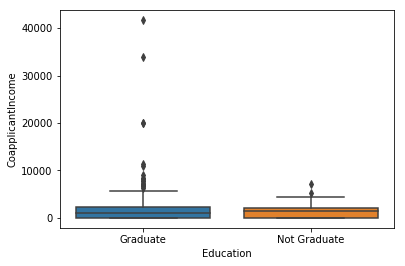

In [22]:
sns.boxplot(train.Education,train.CoapplicantIncome)

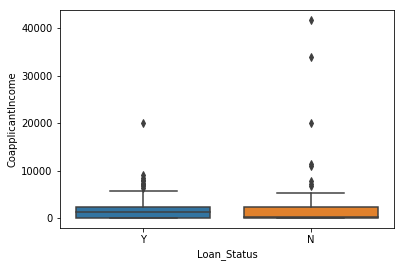

In [23]:
sns.boxplot(train.Loan_Status,train.CoapplicantIncome)
plt.show()

In [24]:
train.CoapplicantIncome.describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

Majority of Coapplicants income is of 5k

In [25]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


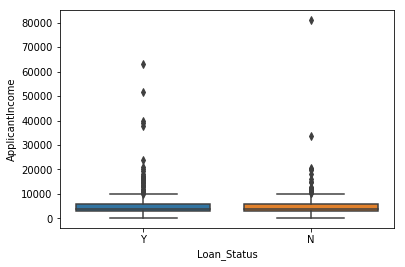

In [26]:
sns.boxplot(train.Loan_Status,train.ApplicantIncome)

Good acceptance rate for high income group as compared to low income group

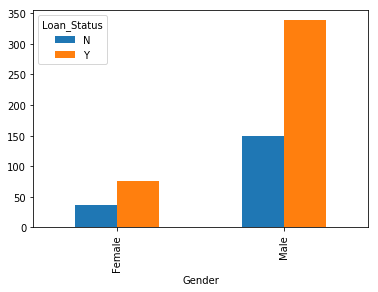

In [27]:

gender=pd.crosstab(train.Gender,train.Loan_Status)

gender.plot(kind='bar')

## Observation Gender vs Loan Status

Males get more loans in comparison to females.

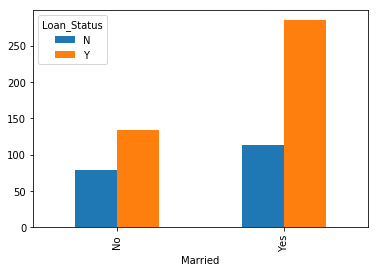

In [28]:
married=pd.crosstab(train.Married,train.Loan_Status)

married.plot(kind='bar')

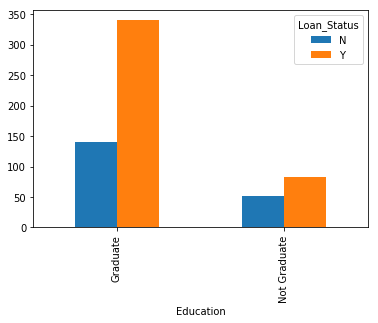

In [29]:
education=pd.crosstab(train.Education,train.Loan_Status)

education.plot(kind='bar')

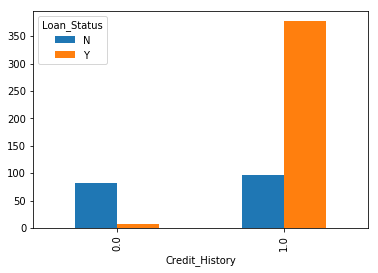

In [30]:
credit=pd.crosstab(train.Credit_History,train.Loan_Status)

credit.plot(kind='bar')

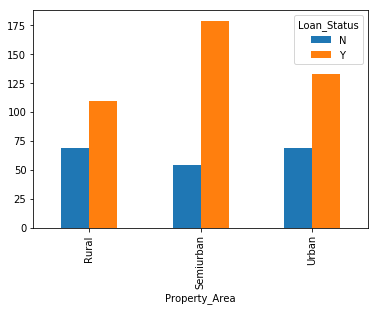

In [31]:
prop=pd.crosstab(train.Property_Area,train.Loan_Status)

prop.plot(kind='bar')

## Observation: Cat vs Cat

1. Graudates get more loan than Non-Graduates
2. Married people get more loan than unmarried.
3. People with Credit History 1 have higher chance of getting loan.
4. People from semi urban areas are the priority than urban and rural.

In [32]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
train.Dependents.value_counts() # Rectify 3+ to 3

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [34]:
train.Dependents.replace(to_replace='3+',value=3,inplace=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


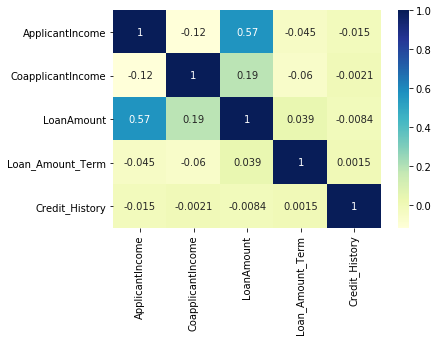

In [36]:
#Correlations
sns.heatmap(train.corr(),cmap='YlGnBu',annot=True)

#COrrelations found out between the loan amount and Aplicant Income
#Also found correlation between Loan Amount and Co-Applicant Income

## Missing Values

In [37]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
train.Gender.fillna(train.Gender.mode()[0],inplace=True)
train.Married.fillna(train.Married.mode()[0],inplace=True)
train.Dependents.fillna(train.Dependents.mode()[0],inplace=True)
train.Self_Employed.fillna(train.Self_Employed.mode()[0],inplace=True)
train.Credit_History.fillna(train.Credit_History.mode()[0],inplace=True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mode()[0],inplace=True)

In [39]:
train.LoanAmount.fillna(128,inplace=True)

In [40]:
test.Gender.fillna(test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(test.Dependents.mode()[0],inplace=True)
test.Self_Employed.fillna(test.Self_Employed.mode()[0],inplace=True)
test.Credit_History.fillna(test.Credit_History.mode()[0],inplace=True)
test.Loan_Amount_Term.fillna(test.Loan_Amount_Term.mode()[0],inplace=True)

In [41]:
test.LoanAmount.fillna(test.LoanAmount.median(),inplace=True)

In [42]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [43]:
train['EMI']=round((train.LoanAmount*1000)/train.Loan_Amount_Term,2)

In [44]:
test['EMI']=round((test.LoanAmount*1000)/test.Loan_Amount_Term,2)

In [45]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,355.56
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,355.56
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,183.33
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,333.33
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,391.67


In [46]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,EMI
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,305.56
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,350.00
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,577.78
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,277.78
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,216.67


In [47]:
train['Total_Income']=train.ApplicantIncome+train.CoapplicantIncome

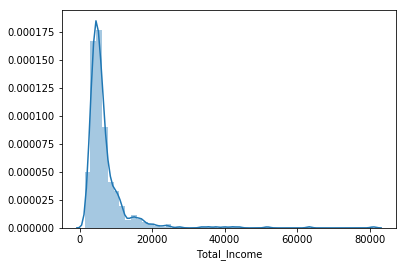

In [48]:
sns.distplot(train.Total_Income)

In [49]:
train['Total_Income_Log']=np.log(train.Total_Income)

In [50]:
train['LoanAmount_Log']=np.log(train.LoanAmount)

In [51]:
train['Emi_Log']=np.log(train.EMI)

In [52]:
test['Total_Income']=test.ApplicantIncome+test.CoapplicantIncome

In [53]:
test['Total_Income_Log']=np.log(test.Total_Income)

In [54]:
test['LoanAmount_Log']=np.log(test.LoanAmount)

In [55]:
test['Emi_Log']=np.log(test.EMI)

In [56]:
train['Loan_Status']=train.Loan_Status.map({'Y':1,'N':0})

In [57]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,EMI,Total_Income,Total_Income_Log,LoanAmount_Log,Emi_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,355.56,5849.0,8.674026,4.852030,5.873694
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,355.56,6091.0,8.714568,4.852030,5.873694
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,183.33,3000.0,8.006368,4.189655,5.211288
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,333.33,4941.0,8.505323,4.787492,5.809133
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,391.67,6000.0,8.699515,4.948760,5.970420


In [58]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,EMI,Total_Income,Total_Income_Log,LoanAmount_Log,Emi_Log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,305.56,5720,8.651724,4.700480,5.722146
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,350.00,4576,8.428581,4.836282,5.857933
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,577.78,6800,8.824678,5.337538,6.359193
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,277.78,4886,8.494129,4.605170,5.626829
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,216.67,3276,8.094378,4.356709,5.378375


In [59]:
print(train.shape)
print(test.shape)

(614, 18)
(367, 17)


In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 17 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
EMI                  367 non-null float64
Total_Income         367 non-null int64
Total_Income_Log     367 non-null float64
LoanAmount_Log       367 non-null float64
Emi_Log              367 non-null float64
dtypes: float64(7), int64(3), object(7)
memory usage: 48.8+ KB


In [61]:
new_train=train.drop(['Loan_ID','Total_Income','LoanAmount','EMI','ApplicantIncome','CoapplicantIncome'],axis=1)
new_test=test.drop(['Loan_ID','Total_Income','LoanAmount','EMI','ApplicantIncome','CoapplicantIncome'],axis=1)

In [62]:
print(new_train.shape)

(614, 12)


In [63]:
print(new_test.shape)

(367, 11)


In [64]:
dum_train=pd.get_dummies(new_train.drop('Loan_Status',axis=1))
dum_test=pd.get_dummies(new_test)

In [65]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [66]:
scaled_train=pd.DataFrame(sc.fit_transform(dum_train),columns=dum_train.columns)
scaled_test=pd.DataFrame(sc.fit_transform(dum_test),columns=dum_test.columns)


E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [67]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(criterion='entropy')

In [68]:
pred=rf.fit(scaled_train,train.Loan_Status).predict(scaled_test)

E:\Users\Soham Raut\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
pd1=pd.DataFrame(pred)

In [70]:
pd1[0]=pd1[0].map({1:'Y',0:'N'})

In [71]:
fin=pd.DataFrame({'Loan_ID':test.Loan_ID,'Loan_Status':pd1[0]})

In [72]:
fin

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,N
3,LP001035,Y
4,LP001051,N
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [73]:
fin.to_csv('fin.csv',index=False)